# Machine Learning and Breast Cancer detection

## Introduction and state of the Art

(Hamza's part)

## An Array of Available solution

(Anthime's part)

## Selecting a solution

The given dataset, outside of the id column that we will not use, contains a column labeling each tumor and a handful of statistical columns containing the average, worst case and standard error about various tumor metrics including : radius, texture, perimeter, area, smoothness, compactness, concavity and concave points. This immediatly presents us with the necessity to standardize and normalize the data, which we will do with the Yeo-Johnson transformation, due to the differences in units and range of each metrics.

With a grand total of 24 data columns, we also have to address the high dimensionality of this data. A first step towards this was to reduce the number of columns to a more acceptable one for a model, to have just enough for it to deduce things without having too much statistical noise to confuse it. To still profit from the richness of the dataset, we have decided to train and confront three different models, each one with a different variation of metrics. I.e, we did one for all means, another one for all standard errors, and a last one for worst case. At the end of our script, we will for experimentation purposes train a model with all the standardized columns to see how it influences accuracy.

As for the type of model we will use, the high dimensionality of data makes hyperplane-based or regression models less easier to wrap our head around. Our final pick was K-Nearest Neighbors, as it easily navigates through high-dimensional spaces, is quite deterministic and easily explainable to non-initiated people. It's a perfect, ready-to-use classification algorithm.

## Implementing

All starts first with the importation of necessary libraries and modules, and of the dataset itself with a code snippet generously provided by the dataset host Kaggle.

In [1]:
import mlcroissant as mlc
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/erdemtaha/cancer-data/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()
# automatic fetching courtesy of the Kaggle platform

# print(record_set_df.columns.to_list()) # Lists columns to know how they are formatted in the dataframe after importation
record_set_df = record_set_df.convert_dtypes() # Data type auto conversion for proper handling
record_set_df["Cancer_Data.csv/diagnosis"] = record_set_df["Cancer_Data.csv/diagnosis"].apply(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x) # Decodes diagnosis info who is encoded as bytes, turns it into string

# Demands before continuing the selected n neighbors we want to launch KNN at
n = int(input("Enter number of neighbors to be considered in KNN : "))

  -  [Metadata(Cancer Data)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="Cancer_Data.csv")]


Enter number of neighbors to be considered in KNN :  15


### Logistical Regression base

In order to have a reference frame to compare our chosen method with other possibilities, we decided to take a shot with a logistical regression, a model often used to perform binary classification. We are indeed performing a binary classification, as we are sorting tumors between a malign and benign class.

#### Means based analysis

In [4]:
# Here, we're only keeping diagnosis and the means linked columns
dataset1 = record_set_df.drop(columns=["Cancer_Data.csv/id", "Cancer_Data.csv/radius_se", "Cancer_Data.csv/texture_se", "Cancer_Data.csv/perimeter_se", "Cancer_Data.csv/area_se", "Cancer_Data.csv/smoothness_se", "Cancer_Data.csv/compactness_se", "Cancer_Data.csv/concavity_se", "Cancer_Data.csv/concave+points_se", "Cancer_Data.csv/symmetry_se", "Cancer_Data.csv/fractal_dimension_se", "Cancer_Data.csv/radius_worst", "Cancer_Data.csv/texture_worst", "Cancer_Data.csv/perimeter_worst", "Cancer_Data.csv/area_worst", "Cancer_Data.csv/smoothness_worst", "Cancer_Data.csv/compactness_worst", "Cancer_Data.csv/concavity_worst", "Cancer_Data.csv/concave+points_worst", "Cancer_Data.csv/symmetry_worst", "Cancer_Data.csv/fractal_dimension_worst"])
print(dataset1)
datasetStandardized1 = PowerTransformer(standardize=True).fit_transform(dataset1.drop(columns=["Cancer_Data.csv/diagnosis"])) # Applying Yeo Johnson to the data for standardization
datasetStandardized1 = pd.DataFrame(datasetStandardized1, columns=dataset1.drop(columns=["Cancer_Data.csv/diagnosis"]).columns, index=dataset1.index)
print(datasetStandardized1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data1, test_data1, target_values1, real_values = train_test_split(datasetStandardized1, dataset1["Cancer_Data.csv/diagnosis"], test_size=0.20, stratify=dataset1["Cancer_Data.csv/diagnosis"])
Reg = LogisticRegression()
Reg.fit(data1, target_values1)
predictions = Reg.predict(test_data1) # Predicts the labels

    Cancer_Data.csv/diagnosis  Cancer_Data.csv/radius_mean  \
0                           M                        17.99   
1                           M                        20.57   
2                           M                        19.69   
3                           M                        11.42   
4                           M                        20.29   
..                        ...                          ...   
564                         M                        21.56   
565                         M                        20.13   
566                         M                         16.6   
567                         M                         20.6   
568                         B                         7.76   

     Cancer_Data.csv/texture_mean  Cancer_Data.csv/perimeter_mean  \
0                           10.38                           122.8   
1                           17.77                           132.9   
2                           21.25               

Statistics of means-focused dataset training
 ---------
Accuracy : 96.49122807017567 %
Precision : 97.22222222222221 %
Recall : 97.22222222222221 %
Specificity : 95.23809523809523 %
AUC : 1.0208333333333335
Metrics from built-in libraries :
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        72
           M       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



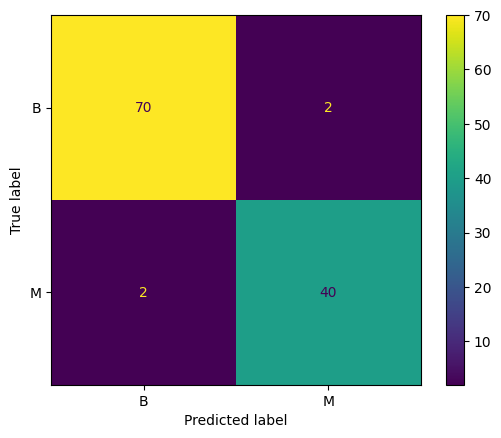

In [5]:
accuracy = 0
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i in range(0,len(predictions)):
    if predictions[i] == real_values.iloc[i]:
        accuracy += 1/len(predictions)
        if predictions[i] == "B":
            truepos += 1
        else:
            trueneg += 1
    else:
        if predictions[i] == "B":
            falsepos += 1
        else:
            falseneg += 1
print("Statistics of means-focused dataset training\n ---------")
print("Accuracy : " + str(accuracy*100) + " %")
print("Precision : " + str((truepos/(truepos+falsepos))*100) + " %")
print("Recall : " + str((truepos/(truepos+falseneg))*100) + " %")
print("Specificity : " + str((trueneg/(trueneg+falsepos))*100) + " %")
print("AUC : " + str((truepos/(truepos+falseneg))/(trueneg/(trueneg+falsepos))))

print("Metrics from built-in libraries :")
print(metrics.classification_report(real_values, predictions))

metrics.ConfusionMatrixDisplay.from_predictions(real_values, predictions)
plt.show()

#### Standard Error based analysis

In [6]:
# Here, we're only keeping diagnosis and the se linked columns
dataset1 = record_set_df.drop(columns=["Cancer_Data.csv/id", "Cancer_Data.csv/radius_mean", "Cancer_Data.csv/texture_mean", "Cancer_Data.csv/perimeter_mean", "Cancer_Data.csv/area_mean", "Cancer_Data.csv/smoothness_mean", "Cancer_Data.csv/compactness_mean", "Cancer_Data.csv/concavity_mean", "Cancer_Data.csv/concave+points_mean", "Cancer_Data.csv/symmetry_mean", "Cancer_Data.csv/fractal_dimension_mean", "Cancer_Data.csv/radius_worst", "Cancer_Data.csv/texture_worst", "Cancer_Data.csv/perimeter_worst", "Cancer_Data.csv/area_worst", "Cancer_Data.csv/smoothness_worst", "Cancer_Data.csv/compactness_worst", "Cancer_Data.csv/concavity_worst", "Cancer_Data.csv/concave+points_worst", "Cancer_Data.csv/symmetry_worst", "Cancer_Data.csv/fractal_dimension_worst"])
print(dataset1)
datasetStandardized1 = PowerTransformer(standardize=True).fit_transform(dataset1.drop(columns=["Cancer_Data.csv/diagnosis"])) # Applying Yeo Johnson to the data for standardization
datasetStandardized1 = pd.DataFrame(datasetStandardized1, columns=dataset1.drop(columns=["Cancer_Data.csv/diagnosis"]).columns, index=dataset1.index)
print(datasetStandardized1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data1, test_data1, target_values1, real_values = train_test_split(datasetStandardized1, dataset1["Cancer_Data.csv/diagnosis"], test_size=0.20, stratify=dataset1["Cancer_Data.csv/diagnosis"])
Reg = LogisticRegression()
Reg.fit(data1, target_values1)
predictions = Reg.predict(test_data1) # Predicts the labels

    Cancer_Data.csv/diagnosis  Cancer_Data.csv/radius_se  \
0                           M                      1.095   
1                           M                     0.5435   
2                           M                     0.7456   
3                           M                     0.4956   
4                           M                     0.7572   
..                        ...                        ...   
564                         M                      1.176   
565                         M                     0.7655   
566                         M                     0.4564   
567                         M                      0.726   
568                         B                     0.3857   

     Cancer_Data.csv/texture_se  Cancer_Data.csv/perimeter_se  \
0                        0.9053                         8.589   
1                        0.7339                         3.398   
2                        0.7869                         4.585   
3                  

Statistics of se-focused dataset training
 ---------
Accuracy : 87.71929824561423 %
Precision : 90.27777777777779 %
Recall : 90.27777777777779 %
Specificity : 83.33333333333334 %
AUC : 1.0833333333333333
Metrics from built-in libraries :
              precision    recall  f1-score   support

           B       0.90      0.90      0.90        72
           M       0.83      0.83      0.83        42

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



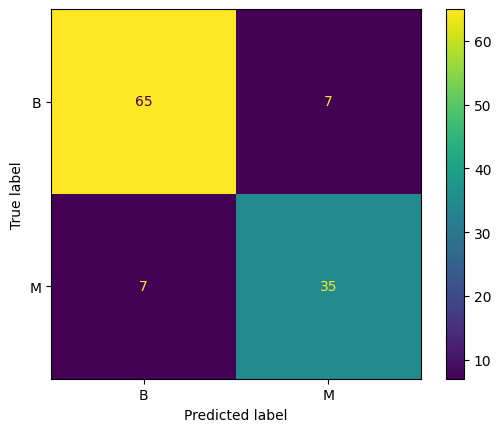

In [7]:
accuracy = 0
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i in range(0,len(predictions)):
    if predictions[i] == real_values.iloc[i]:
        accuracy += 1/len(predictions)
        if predictions[i] == "B":
            truepos += 1
        else:
            trueneg += 1
    else:
        if predictions[i] == "B":
            falsepos += 1
        else:
            falseneg += 1
print("Statistics of se-focused dataset training\n ---------")
print("Accuracy : " + str(accuracy*100) + " %")
print("Precision : " + str((truepos/(truepos+falsepos))*100) + " %")
print("Recall : " + str((truepos/(truepos+falseneg))*100) + " %")
print("Specificity : " + str((trueneg/(trueneg+falsepos))*100) + " %")
print("AUC : " + str((truepos/(truepos+falseneg))/(trueneg/(trueneg+falsepos))))

print("Metrics from built-in libraries :")
print(metrics.classification_report(real_values, predictions))

metrics.ConfusionMatrixDisplay.from_predictions(real_values, predictions)
plt.show()

#### Worst case analysis

In [8]:
# Here, we're only keeping diagnosis and the worst linked columns
dataset1 = record_set_df.drop(columns=["Cancer_Data.csv/id", "Cancer_Data.csv/radius_se", "Cancer_Data.csv/texture_se", "Cancer_Data.csv/perimeter_se", "Cancer_Data.csv/area_se", "Cancer_Data.csv/smoothness_se", "Cancer_Data.csv/compactness_se", "Cancer_Data.csv/concavity_se", "Cancer_Data.csv/concave+points_se", "Cancer_Data.csv/symmetry_se", "Cancer_Data.csv/fractal_dimension_se", "Cancer_Data.csv/radius_mean", "Cancer_Data.csv/texture_mean", "Cancer_Data.csv/perimeter_mean", "Cancer_Data.csv/area_mean", "Cancer_Data.csv/smoothness_mean", "Cancer_Data.csv/compactness_mean", "Cancer_Data.csv/concavity_mean", "Cancer_Data.csv/concave+points_mean", "Cancer_Data.csv/symmetry_mean", "Cancer_Data.csv/fractal_dimension_mean"])
print(dataset1)
datasetStandardized1 = PowerTransformer(standardize=True).fit_transform(dataset1.drop(columns=["Cancer_Data.csv/diagnosis"])) # Applying Yeo Johnson to the data for standardization
datasetStandardized1 = pd.DataFrame(datasetStandardized1, columns=dataset1.drop(columns=["Cancer_Data.csv/diagnosis"]).columns, index=dataset1.index)
print(datasetStandardized1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data1, test_data1, target_values1, real_values = train_test_split(datasetStandardized1, dataset1["Cancer_Data.csv/diagnosis"], test_size=0.20, stratify=dataset1["Cancer_Data.csv/diagnosis"])
Reg = LogisticRegression()
Reg.fit(data1, target_values1)
predictions = Reg.predict(test_data1) # Predicts the labels

    Cancer_Data.csv/diagnosis  Cancer_Data.csv/radius_worst  \
0                           M                         25.38   
1                           M                         24.99   
2                           M                         23.57   
3                           M                         14.91   
4                           M                         22.54   
..                        ...                           ...   
564                         M                         25.45   
565                         M                         23.69   
566                         M                         18.98   
567                         M                         25.74   
568                         B                         9.456   

     Cancer_Data.csv/texture_worst  Cancer_Data.csv/perimeter_worst  \
0                            17.33                            184.6   
1                            23.41                            158.8   
2                            2

Statistics of worst-case-focused dataset training
 ---------
Accuracy : 98.24561403508795 %
Precision : 100.0 %
Recall : 97.22222222222221 %
Specificity : 100.0 %
AUC : 0.9722222222222222
Metrics from built-in libraries :
              precision    recall  f1-score   support

           B       1.00      0.97      0.99        72
           M       0.95      1.00      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



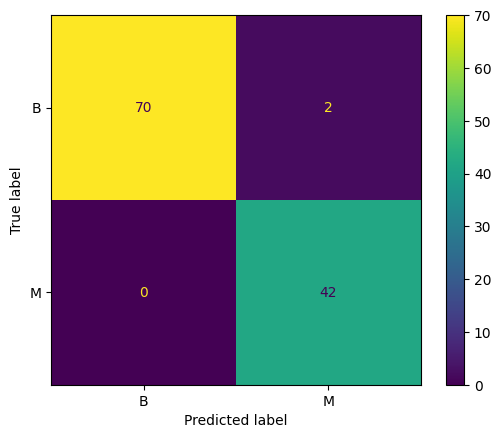

In [9]:
accuracy = 0
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i in range(0,len(predictions)):
    if predictions[i] == real_values.iloc[i]:
        accuracy += 1/len(predictions)
        if predictions[i] == "B":
            truepos += 1
        else:
            trueneg += 1
    else:
        if predictions[i] == "B":
            falsepos += 1
        else:
            falseneg += 1
print("Statistics of worst-case-focused dataset training\n ---------")
print("Accuracy : " + str(accuracy*100) + " %")
print("Precision : " + str((truepos/(truepos+falsepos))*100) + " %")
print("Recall : " + str((truepos/(truepos+falseneg))*100) + " %")
print("Specificity : " + str((trueneg/(trueneg+falsepos))*100) + " %")
print("AUC : " + str((truepos/(truepos+falseneg))/(trueneg/(trueneg+falsepos))))

print("Metrics from built-in libraries :")
print(metrics.classification_report(real_values, predictions))

metrics.ConfusionMatrixDisplay.from_predictions(real_values, predictions)
plt.show()

#### All Dimensional

In [10]:
dataset1 = record_set_df
print(dataset1)
datasetStandardized1 = PowerTransformer(standardize=True).fit_transform(dataset1.drop(columns=["Cancer_Data.csv/diagnosis"])) # Applying Yeo Johnson to the data for standardization
datasetStandardized1 = pd.DataFrame(datasetStandardized1, columns=dataset1.drop(columns=["Cancer_Data.csv/diagnosis"]).columns, index=dataset1.index)
print(datasetStandardized1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data1, test_data1, target_values1, real_values = train_test_split(datasetStandardized1, dataset1["Cancer_Data.csv/diagnosis"], test_size=0.20, stratify=dataset1["Cancer_Data.csv/diagnosis"])
Reg = LogisticRegression()
Reg.fit(data1, target_values1)
predictions = Reg.predict(test_data1) # Predicts the labels

    Cancer_Data.csv/id Cancer_Data.csv/diagnosis  Cancer_Data.csv/radius_mean  \
0            b'842302'                         M                        17.99   
1            b'842517'                         M                        20.57   
2          b'84300903'                         M                        19.69   
3          b'84348301'                         M                        11.42   
4          b'84358402'                         M                        20.29   
..                 ...                       ...                          ...   
564          b'926424'                         M                        21.56   
565          b'926682'                         M                        20.13   
566          b'926954'                         M                         16.6   
567          b'927241'                         M                         20.6   
568           b'92751'                         B                         7.76   

     Cancer_Data.csv/textur

Statistics of all-dimensional dataset training
 ---------
Accuracy : 98.24561403508795 %
Precision : 97.2972972972973 %
Recall : 100.0 %
Specificity : 95.23809523809523 %
AUC : 1.05
Metrics from built-in libraries :
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



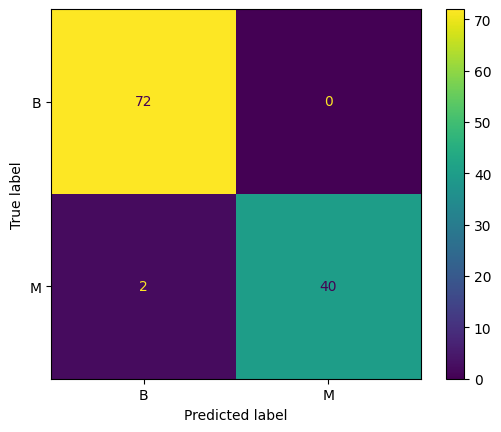

In [11]:
accuracy = 0
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i in range(0,len(predictions)):
    if predictions[i] == real_values.iloc[i]:
        accuracy += 1/len(predictions)
        if predictions[i] == "B":
            truepos += 1
        else:
            trueneg += 1
    else:
        if predictions[i] == "B":
            falsepos += 1
        else:
            falseneg += 1
print("Statistics of all-dimensional dataset training\n ---------")
print("Accuracy : " + str(accuracy*100) + " %")
print("Precision : " + str((truepos/(truepos+falsepos))*100) + " %")
print("Recall : " + str((truepos/(truepos+falseneg))*100) + " %")
print("Specificity : " + str((trueneg/(trueneg+falsepos))*100) + " %")
print("AUC : " + str((truepos/(truepos+falseneg))/(trueneg/(trueneg+falsepos))))

print("Metrics from built-in libraries :")
print(metrics.classification_report(real_values, predictions))

metrics.ConfusionMatrixDisplay.from_predictions(real_values, predictions)
plt.show()

### KNN analysis

#### Means based analysis

Keeping only the means of each metric, we try to predict from such data the dangerosity of tumors. We use the train_test_split function with a 80/20 ratio to have a good sampling for our training and test set. Following the discovery of a built-in confusion matrix tool in a later lab, we appended it to our code to compare our self computed predictions metrics from the algorithm present in SciKit learn.

In [2]:
# Here, we're only keeping diagnosis and the means linked columns
dataset1 = record_set_df.drop(columns=["Cancer_Data.csv/id", "Cancer_Data.csv/radius_se", "Cancer_Data.csv/texture_se", "Cancer_Data.csv/perimeter_se", "Cancer_Data.csv/area_se", "Cancer_Data.csv/smoothness_se", "Cancer_Data.csv/compactness_se", "Cancer_Data.csv/concavity_se", "Cancer_Data.csv/concave+points_se", "Cancer_Data.csv/symmetry_se", "Cancer_Data.csv/fractal_dimension_se", "Cancer_Data.csv/radius_worst", "Cancer_Data.csv/texture_worst", "Cancer_Data.csv/perimeter_worst", "Cancer_Data.csv/area_worst", "Cancer_Data.csv/smoothness_worst", "Cancer_Data.csv/compactness_worst", "Cancer_Data.csv/concavity_worst", "Cancer_Data.csv/concave+points_worst", "Cancer_Data.csv/symmetry_worst", "Cancer_Data.csv/fractal_dimension_worst"])
print(dataset1)
datasetStandardized1 = PowerTransformer(standardize=True).fit_transform(dataset1.drop(columns=["Cancer_Data.csv/diagnosis"])) # Applying Yeo Johnson to the data for standardization
datasetStandardized1 = pd.DataFrame(datasetStandardized1, columns=dataset1.drop(columns=["Cancer_Data.csv/diagnosis"]).columns, index=dataset1.index)
print(datasetStandardized1)

from sklearn.model_selection import train_test_split
data1, test_data1, target_values1, real_values = train_test_split(datasetStandardized1, dataset1["Cancer_Data.csv/diagnosis"], test_size=0.20, stratify=dataset1["Cancer_Data.csv/diagnosis"])
KNN1 = KNeighborsClassifier(n_neighbors=n)
KNN1.fit(data1, target_values1)
predictions = KNN1.predict(test_data1) # Predicts the labels

    Cancer_Data.csv/diagnosis  Cancer_Data.csv/radius_mean  \
0                           M                        17.99   
1                           M                        20.57   
2                           M                        19.69   
3                           M                        11.42   
4                           M                        20.29   
..                        ...                          ...   
564                         M                        21.56   
565                         M                        20.13   
566                         M                         16.6   
567                         M                         20.6   
568                         B                         7.76   

     Cancer_Data.csv/texture_mean  Cancer_Data.csv/perimeter_mean  \
0                           10.38                           122.8   
1                           17.77                           132.9   
2                           21.25               

Statistics of means-focused dataset training
 ---------
Accuracy : 93.85964912280723 %
Precision : 93.33333333333333 %
Recall : 97.22222222222221 %
Specificity : 88.09523809523809 %
AUC : 1.1036036036036037
Metrics from built-in libraries :
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        72
           M       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



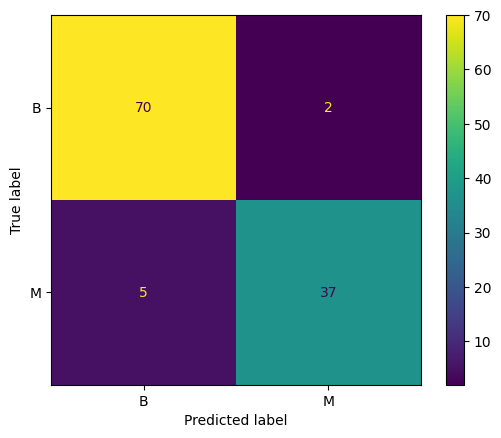

In [3]:
accuracy = 0
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i in range(0,len(predictions)):
    if predictions[i] == real_values.iloc[i]:
        accuracy += 1/len(predictions)
        if predictions[i] == "B":
            truepos += 1
        else:
            trueneg += 1
    else:
        if predictions[i] == "B":
            falsepos += 1
        else:
            falseneg += 1
print("Statistics of means-focused dataset training\n ---------")
print("Accuracy : " + str(accuracy*100) + " %")
print("Precision : " + str((truepos/(truepos+falsepos))*100) + " %")
print("Recall : " + str((truepos/(truepos+falseneg))*100) + " %")
print("Specificity : " + str((trueneg/(trueneg+falsepos))*100) + " %")
print("AUC : " + str((truepos/(truepos+falseneg))/(trueneg/(trueneg+falsepos))))

print("Metrics from built-in libraries :")
print(metrics.classification_report(real_values, predictions))

metrics.ConfusionMatrixDisplay.from_predictions(real_values, predictions)
plt.show()

#### Standard Error based Analysis

We only keep the standard error columns here. 

In [5]:
# Here, we're only keeping diagnosis and the se linked columns
dataset1 = record_set_df.drop(columns=["Cancer_Data.csv/id", "Cancer_Data.csv/radius_mean", "Cancer_Data.csv/texture_mean", "Cancer_Data.csv/perimeter_mean", "Cancer_Data.csv/area_mean", "Cancer_Data.csv/smoothness_mean", "Cancer_Data.csv/compactness_mean", "Cancer_Data.csv/concavity_mean", "Cancer_Data.csv/concave+points_mean", "Cancer_Data.csv/symmetry_mean", "Cancer_Data.csv/fractal_dimension_mean", "Cancer_Data.csv/radius_worst", "Cancer_Data.csv/texture_worst", "Cancer_Data.csv/perimeter_worst", "Cancer_Data.csv/area_worst", "Cancer_Data.csv/smoothness_worst", "Cancer_Data.csv/compactness_worst", "Cancer_Data.csv/concavity_worst", "Cancer_Data.csv/concave+points_worst", "Cancer_Data.csv/symmetry_worst", "Cancer_Data.csv/fractal_dimension_worst"])
print(dataset1)
datasetStandardized1 = PowerTransformer(standardize=True).fit_transform(dataset1.drop(columns=["Cancer_Data.csv/diagnosis"])) # Applying Yeo Johnson to the data for standardization
datasetStandardized1 = pd.DataFrame(datasetStandardized1, columns=dataset1.drop(columns=["Cancer_Data.csv/diagnosis"]).columns, index=dataset1.index)
print(datasetStandardized1)

data1, test_data1, target_values1, real_values = train_test_split(datasetStandardized1, dataset1["Cancer_Data.csv/diagnosis"], test_size=0.20, stratify=dataset1["Cancer_Data.csv/diagnosis"])
KNN1 = KNeighborsClassifier(n_neighbors=n)
KNN1.fit(data1, target_values1)
predictions = KNN1.predict(test_data1) # Predicts the labels

    Cancer_Data.csv/diagnosis  Cancer_Data.csv/radius_se  \
0                           M                      1.095   
1                           M                     0.5435   
2                           M                     0.7456   
3                           M                     0.4956   
4                           M                     0.7572   
..                        ...                        ...   
564                         M                      1.176   
565                         M                     0.7655   
566                         M                     0.4564   
567                         M                      0.726   
568                         B                     0.3857   

     Cancer_Data.csv/texture_se  Cancer_Data.csv/perimeter_se  \
0                        0.9053                         8.589   
1                        0.7339                         3.398   
2                        0.7869                         4.585   
3                  

Statistics of se-focused dataset training
 ---------
Accuracy : 85.96491228070194 %
Precision : 91.17647058823529 %
Recall : 86.11111111111111 %
Specificity : 85.71428571428571 %
AUC : 1.0046296296296298
Metrics from built-in libraries :
              precision    recall  f1-score   support

           B       0.91      0.86      0.89        72
           M       0.78      0.86      0.82        42

    accuracy                           0.86       114
   macro avg       0.85      0.86      0.85       114
weighted avg       0.86      0.86      0.86       114



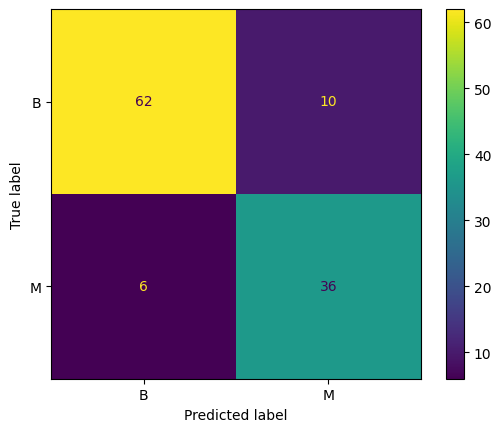

In [8]:
accuracy = 0
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i in range(0,len(predictions)):
    if predictions[i] == real_values.iloc[i]:
        accuracy += 1/len(predictions)
        if predictions[i] == "B":
            truepos += 1
        else:
            trueneg += 1
    else:
        if predictions[i] == "B":
            falsepos += 1
        else:
            falseneg += 1
print("Statistics of se-focused dataset training\n ---------")
print("Accuracy : " + str(accuracy*100) + " %")
print("Precision : " + str((truepos/(truepos+falsepos))*100) + " %")
print("Recall : " + str((truepos/(truepos+falseneg))*100) + " %")
print("Specificity : " + str((trueneg/(trueneg+falsepos))*100) + " %")
print("AUC : " + str((truepos/(truepos+falseneg))/(trueneg/(trueneg+falsepos))))

print("Metrics from built-in libraries :")
print(metrics.classification_report(real_values, predictions))

metrics.ConfusionMatrixDisplay.from_predictions(real_values, predictions)
plt.show()

#### Worst Case based analysis

We assumed worst meant worst case scenario value. 

In [16]:
# Here, we're only keeping diagnosis and the worst linked columns
dataset1 = record_set_df.drop(columns=["Cancer_Data.csv/id", "Cancer_Data.csv/radius_se", "Cancer_Data.csv/texture_se", "Cancer_Data.csv/perimeter_se", "Cancer_Data.csv/area_se", "Cancer_Data.csv/smoothness_se", "Cancer_Data.csv/compactness_se", "Cancer_Data.csv/concavity_se", "Cancer_Data.csv/concave+points_se", "Cancer_Data.csv/symmetry_se", "Cancer_Data.csv/fractal_dimension_se", "Cancer_Data.csv/radius_mean", "Cancer_Data.csv/texture_mean", "Cancer_Data.csv/perimeter_mean", "Cancer_Data.csv/area_mean", "Cancer_Data.csv/smoothness_mean", "Cancer_Data.csv/compactness_mean", "Cancer_Data.csv/concavity_mean", "Cancer_Data.csv/concave+points_mean", "Cancer_Data.csv/symmetry_mean", "Cancer_Data.csv/fractal_dimension_mean"])
print(dataset1)
datasetStandardized1 = PowerTransformer(standardize=True).fit_transform(dataset1.drop(columns=["Cancer_Data.csv/diagnosis"])) # Applying Yeo Johnson to the data for standardization
datasetStandardized1 = pd.DataFrame(datasetStandardized1, columns=dataset1.drop(columns=["Cancer_Data.csv/diagnosis"]).columns, index=dataset1.index)
print(datasetStandardized1)

data1, test_data1, target_values1, real_values = train_test_split(datasetStandardized1, dataset1["Cancer_Data.csv/diagnosis"], test_size=0.20, stratify=dataset1["Cancer_Data.csv/diagnosis"])
KNN1 = KNeighborsClassifier(n_neighbors=n)
KNN1.fit(data1, target_values1)
predictions = KNN1.predict(test_data1) # Predicts the labels

    Cancer_Data.csv/diagnosis  Cancer_Data.csv/radius_worst  \
0                           M                         25.38   
1                           M                         24.99   
2                           M                         23.57   
3                           M                         14.91   
4                           M                         22.54   
..                        ...                           ...   
564                         M                         25.45   
565                         M                         23.69   
566                         M                         18.98   
567                         M                         25.74   
568                         B                         9.456   

     Cancer_Data.csv/texture_worst  Cancer_Data.csv/perimeter_worst  \
0                            17.33                            184.6   
1                            23.41                            158.8   
2                            2

Statistics of worst-case-focused dataset training
 ---------
Accuracy : 95.61403508771951 %
Precision : 94.66666666666667 %
Recall : 98.61111111111111 %
Specificity : 90.47619047619048 %
AUC : 1.0899122807017545
Metrics from built-in libraries :
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



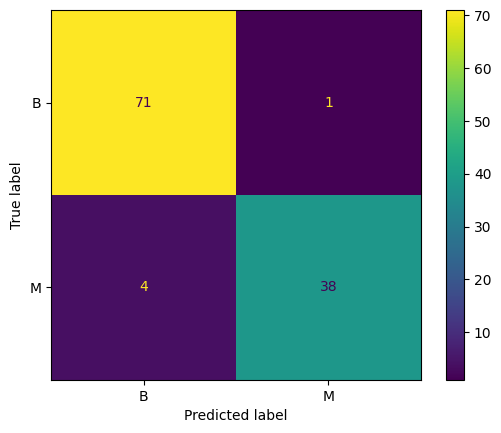

In [17]:
accuracy = 0
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i in range(0,len(predictions)):
    if predictions[i] == real_values.iloc[i]:
        accuracy += 1/len(predictions)
        if predictions[i] == "B":
            truepos += 1
        else:
            trueneg += 1
    else:
        if predictions[i] == "B":
            falsepos += 1
        else:
            falseneg += 1
print("Statistics of worst-case-focused dataset training\n ---------")
print("Accuracy : " + str(accuracy*100) + " %")
print("Precision : " + str((truepos/(truepos+falsepos))*100) + " %")
print("Recall : " + str((truepos/(truepos+falseneg))*100) + " %")
print("Specificity : " + str((trueneg/(trueneg+falsepos))*100) + " %")
print("AUC : " + str((truepos/(truepos+falseneg))/(trueneg/(trueneg+falsepos))))

print("Metrics from built-in libraries :")
print(metrics.classification_report(real_values, predictions))

metrics.ConfusionMatrixDisplay.from_predictions(real_values, predictions)
plt.show()

#### All-Dimensional Analysis

In [13]:
dataset1 = record_set_df
print(dataset1)
datasetStandardized1 = PowerTransformer(standardize=True).fit_transform(dataset1.drop(columns=["Cancer_Data.csv/diagnosis"])) # Applying Yeo Johnson to the data for standardization
datasetStandardized1 = pd.DataFrame(datasetStandardized1, columns=dataset1.drop(columns=["Cancer_Data.csv/diagnosis"]).columns, index=dataset1.index)
print(datasetStandardized1)

data1, test_data1, target_values1, real_values = train_test_split(datasetStandardized1, dataset1["Cancer_Data.csv/diagnosis"], test_size=0.20, stratify=dataset1["Cancer_Data.csv/diagnosis"])
KNN1 = KNeighborsClassifier(n_neighbors=n)
KNN1.fit(data1, target_values1)
predictions = KNN1.predict(test_data1) # Predicts the labels

    Cancer_Data.csv/id Cancer_Data.csv/diagnosis  Cancer_Data.csv/radius_mean  \
0            b'842302'                         M                        17.99   
1            b'842517'                         M                        20.57   
2          b'84300903'                         M                        19.69   
3          b'84348301'                         M                        11.42   
4          b'84358402'                         M                        20.29   
..                 ...                       ...                          ...   
564          b'926424'                         M                        21.56   
565          b'926682'                         M                        20.13   
566          b'926954'                         M                         16.6   
567          b'927241'                         M                         20.6   
568           b'92751'                         B                         7.76   

     Cancer_Data.csv/textur

Statistics of all-dimensional dataset training
 ---------
Accuracy : 96.49122807017567 %
Precision : 94.73684210526315 %
Recall : 100.0 %
Specificity : 90.47619047619048 %
AUC : 1.1052631578947367
Metrics from built-in libraries :
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



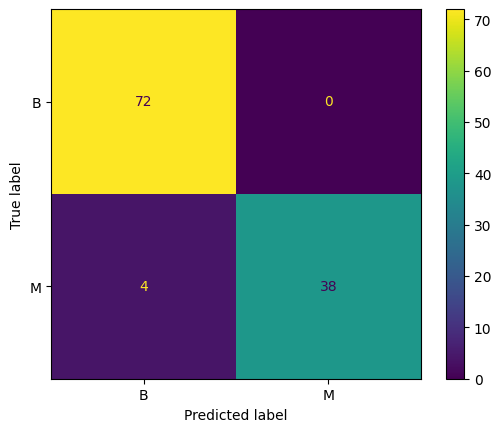

In [15]:
accuracy = 0
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0
for i in range(0,len(predictions)):
    if predictions[i] == real_values.iloc[i]:
        accuracy += 1/len(predictions)
        if predictions[i] == "B":
            truepos += 1
        else:
            trueneg += 1
    else:
        if predictions[i] == "B":
            falsepos += 1
        else:
            falseneg += 1
print("Statistics of all-dimensional dataset training\n ---------")
print("Accuracy : " + str(accuracy*100) + " %")
print("Precision : " + str((truepos/(truepos+falsepos))*100) + " %")
print("Recall : " + str((truepos/(truepos+falseneg))*100) + " %")
print("Specificity : " + str((trueneg/(trueneg+falsepos))*100) + " %")
print("AUC : " + str((truepos/(truepos+falseneg))/(trueneg/(trueneg+falsepos))))

print("Metrics from built-in libraries :")
print(metrics.classification_report(real_values, predictions))
metrics.ConfusionMatrixDisplay.from_predictions(real_values, predictions)
plt.show()

## Analysing results

To our surprise, the best performing KNN model was the All-Dimensional one with an accuracy of 96.49% and an AUC of 1.105, with a lack of false negatives. If this might showcase the strength of KNN against the growing dimensionality of datasets, we can still have satisfactory results with the separate 8-uplets of columns we select. The best performing model among this methodology being the worst case scenario model, with a 0.96 accuracy. 

The odd one out is the worst performing model among all, the Standard Error based one with a 0.86 accuracy, but with an AUC very close to 1, which should translate into semi-perfect fitting. We are not sure if such situation is normal or if it is an error of calculation on our side, however considering the standard error only measures a certain deviation from the norm, we can agree it can be expected that basing our model's analysis on it is really picking the worst statistical tool out of the box.

Comparing to our logistical regression baseline, we have to recognize that the KNN model underperforms in accuracy in all cases : 96.49% regression (equaling already KNN’s best performing model !) vs 93.85% KNN in means scenarios, 87.72% regression vs 85.96% KNN in standard error scenario, 98.24% regression vs 95.61% KNN in worst case scenario, and finally 98.24% regression vs 96.49% KNN in all dimensional analysis ! The all dimensional regression model also beats KNN in terms of AUC, with a value of exactly 1.05. Thus, our baseline, contrarily to your assumption, is rather the best model for the situation.

The most interesting elements in this comparison are that the regression models follows the same performance evolution throughout our dataset restriction as in the KNN models, showing that indeed the standard error is the worst indicator in the dataset among all. However, the regression accuracy in the worst case and all dimensional scenario are practically identical, whereas in KNN there is a 0.8% difference between the two. Although the statistical significance of this could be debated, we could argue that the worst-case scenario statistic contains the core of the information needed to diagnose breast cancer, even if both models seem to be robust with more features added to the dataset.
